# Deteção de fraudes no cartão de crédito

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style='darkgrid', palette='crest')

In [3]:
df = pd.read_csv('data/creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


## Exploratório de Dados
Na seção Exploratória de Dados, analisamos o conjunto de dados usando técnicas estatísticas e de visualização para obter informações sobre os dados e identificar possíveis problemas. Essa fase é crucial para identificar possíveis vieses e garantir que o modelo seja treinado em um conjunto de dados confiável.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [5]:
df.shape

(284807, 31)

Como visto nos dados tempo, quantidade e classe são as únicas categorias que podemos, as demais de V1 a V28 tiveram sua dimensionalidade reduzida através do PCA e também não precisarão passar por nenhum processo de padronização, pois já passaram pelo PCA

### Univariado
Na seção Análise Univariada, explorarei cada variável no conjunto de dados individualmente

<AxesSubplot:xlabel='Class', ylabel='count'>

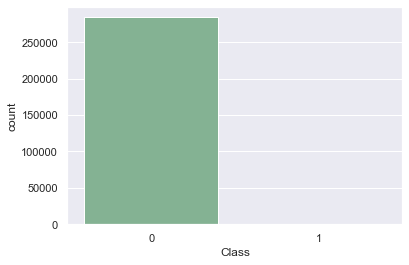

In [6]:
sns.countplot(data=df, x='Class')

In [7]:
df.Class.value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [8]:
df.Class.value_counts(normalize=True)

0    0.998273
1    0.001727
Name: Class, dtype: float64

Vemos um alvo totalmente desbalanceado, nesses casos podemos fazer algumas trativas para não enviesar nosso modelo, algumas abordagens para evitar dados desbalanceados como oversampling, undersampling ou geração de dados sintéticos. Mas neste projeto, usarei o método de subamostragem e os valores da classe majoritária serão reduzidos.

In [9]:
df['Class'] = df['Class'].astype('category')

### Tempo

<AxesSubplot:xlabel='Time'>

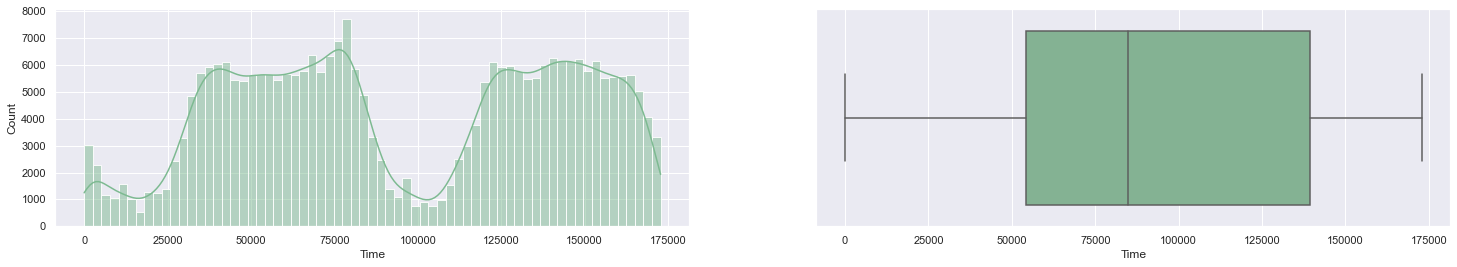

In [10]:
fig, ax = plt.subplots(ncols=2, figsize=(25,4))
sns.histplot(data=df, x='Time', kde=True, ax=ax[0])
sns.boxplot(data=df, x='Time', ax=ax[1])

### Quantidade

<AxesSubplot:xlabel='Amount'>

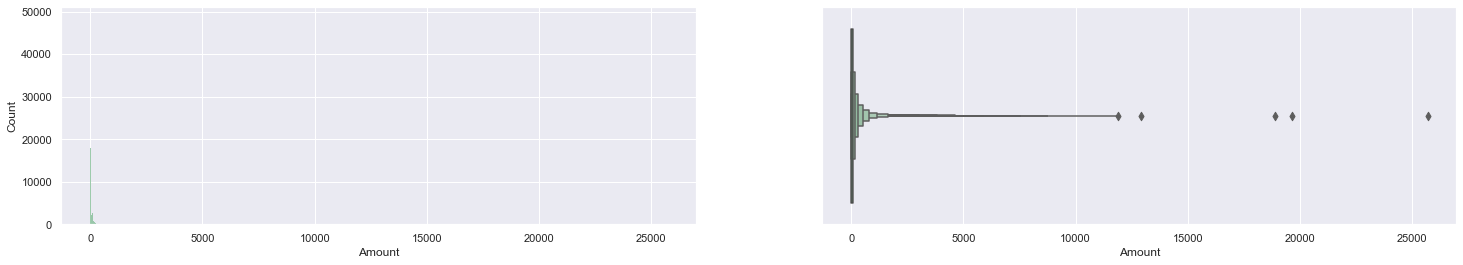

In [11]:
fig, ax = plt.subplots(ncols=2, figsize=(25,4))
sns.histplot(data=df, x= 'Amount', ax=ax[0])
sns.boxenplot(data=df, x= 'Amount', ax=ax[1])

### Hora

In [12]:
df['Hour'] = df['Time'].apply(lambda x: int(np.ceil(float(x)/3600) % 24))

<AxesSubplot:xlabel='Hour'>

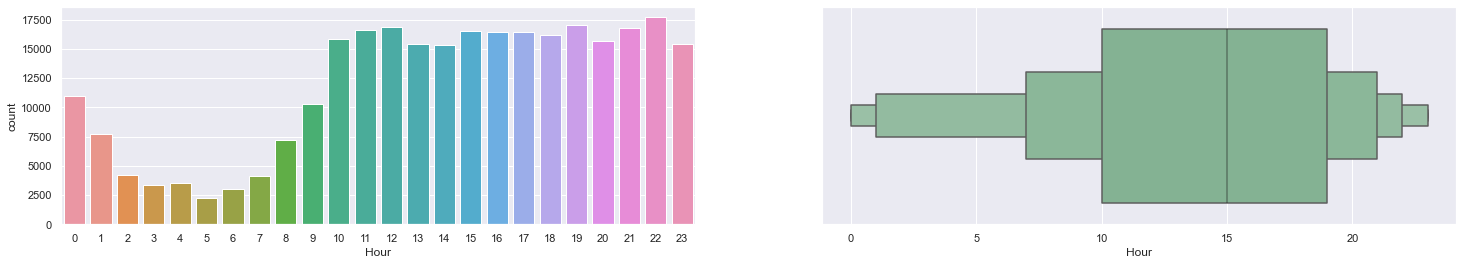

In [13]:
fig, ax = plt.subplots(ncols=2, figsize=(25,4))
sns.countplot(data=df, x='Hour', ax=ax[0])
sns.boxenplot(data=df, x='Hour', ax=ax[1])

### Bivariada
Na seção Análise Bivariada, explorarei a relação entre duas variáveis ​​no conjunto de dados

Hora por classes

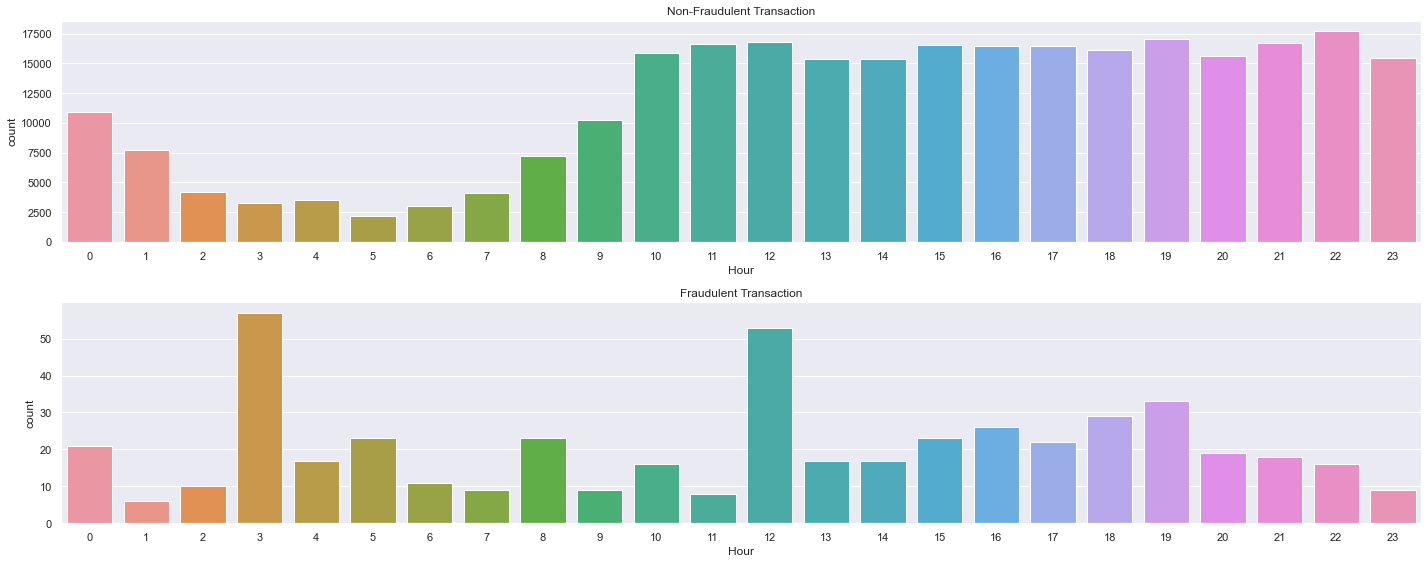

In [14]:
fig, axs = plt.subplots(nrows=2, figsize=(20,8))
axs = axs.ravel()

axs[0].set_title("Non-Fraudulent Transaction")
sns.countplot(data=df[ df.Class == 0 ], x= 'Hour', ax=axs[0])

axs[1].set_title("Fraudulent Transaction")
sns.countplot(data=df[ df.Class == 1 ], x= 'Hour', ax=axs[1])

plt.tight_layout()

In [15]:
df.groupby('Class')['Hour'].describe()

,count,mean,std,min,25%,50%,75%,max
Class,,,,,,,,
0,284315.0,14.128924,6.229159,0.0,10.0,15.0,19.0,23.0
1,492.0,11.621951,6.683975,0.0,5.0,12.0,18.0,23.0


Quantidade por classe

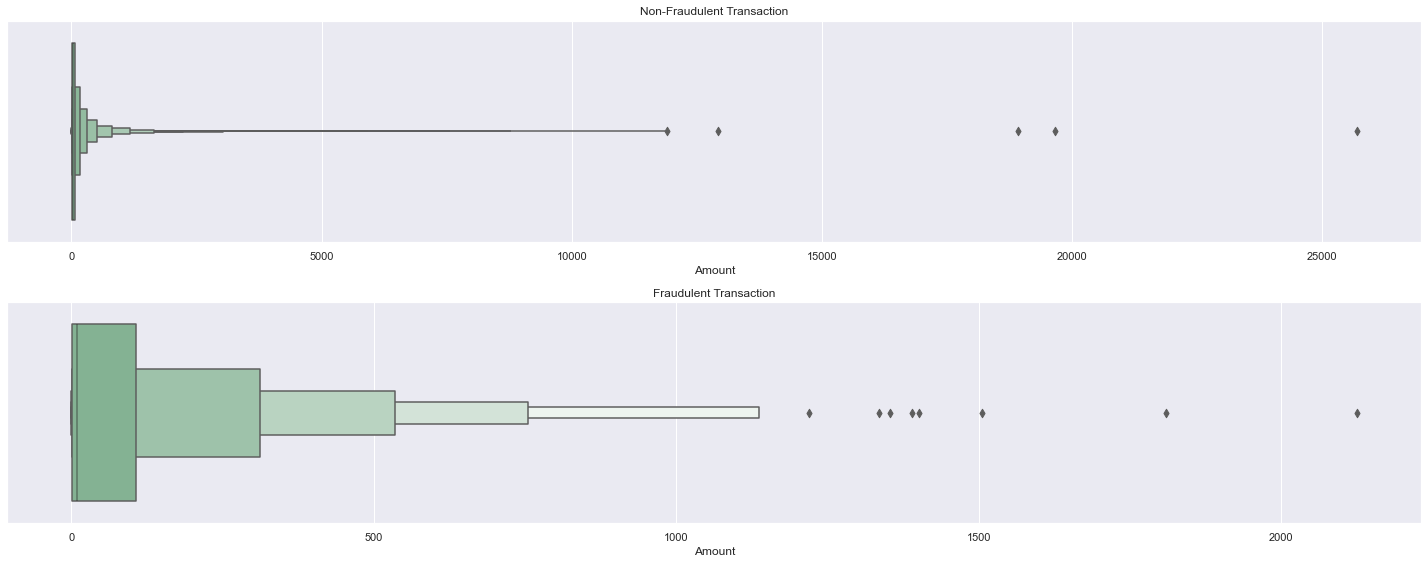

In [16]:
fig, axs = plt.subplots(nrows=2, figsize=(20,8))
axs = axs.ravel()

axs[0].set_title("Non-Fraudulent Transaction")
sns.boxenplot(data=df[ df.Class == 0 ], x= 'Amount', ax=axs[0])

axs[1].set_title("Fraudulent Transaction")
sns.boxenplot(data=df[ df.Class == 1 ], x= 'Amount', ax=axs[1])

plt.tight_layout()

In [17]:
df.groupby('Class')['Amount'].describe()

,count,mean,std,min,25%,50%,75%,max
Class,,,,,,,,
0,284315.0,88.291022,250.105092,0.0,5.65,22.00,77.05,25691.16
1,492.0,122.211321,256.683288,0.0,1.00,9.25,105.89,2125.87


Hora e quantidade por classe

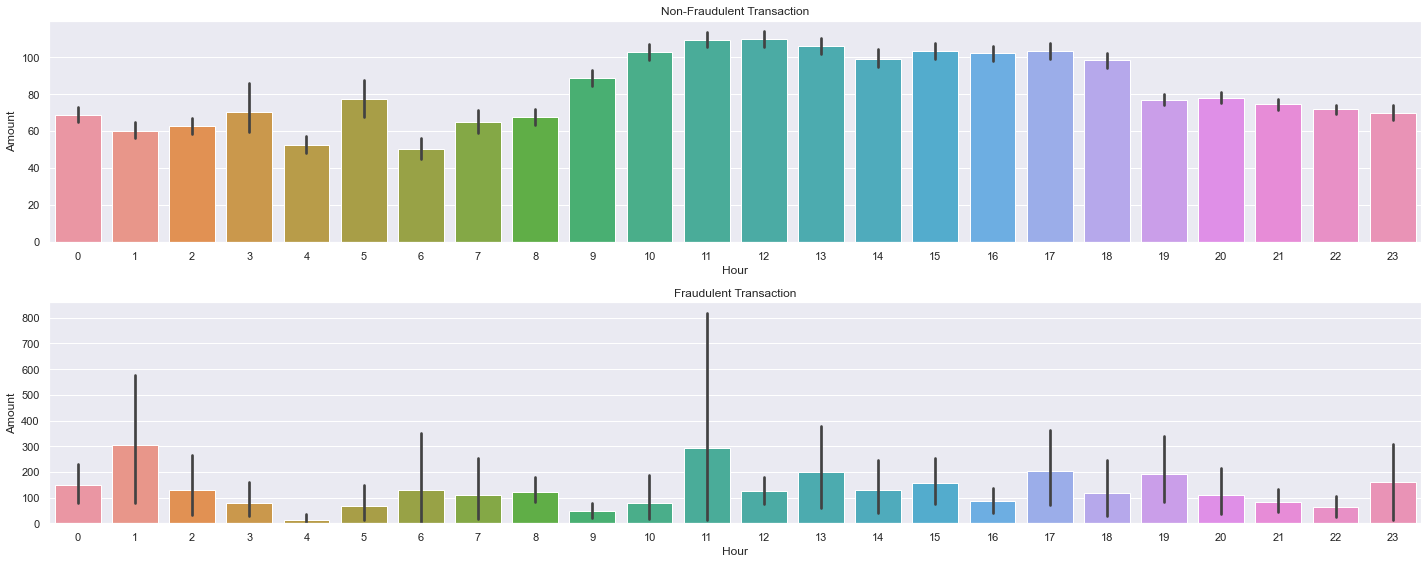

In [18]:
fig, axs = plt.subplots(nrows=2, figsize=(20,8))
axs = axs.ravel()

axs[0].set_title("Non-Fraudulent Transaction")
sns.barplot(data=df[ df.Class == 0 ], x= 'Hour', y='Amount', ax=axs[0])

axs[1].set_title("Fraudulent Transaction")
sns.barplot(data=df[ df.Class == 1 ], x= 'Hour', y='Amount', ax=axs[1])

plt.tight_layout()

### Correlação 


In [19]:
df = df.drop('Hour', axis=1)

In [20]:
corr = df.corr(method='pearson')

<AxesSubplot:>

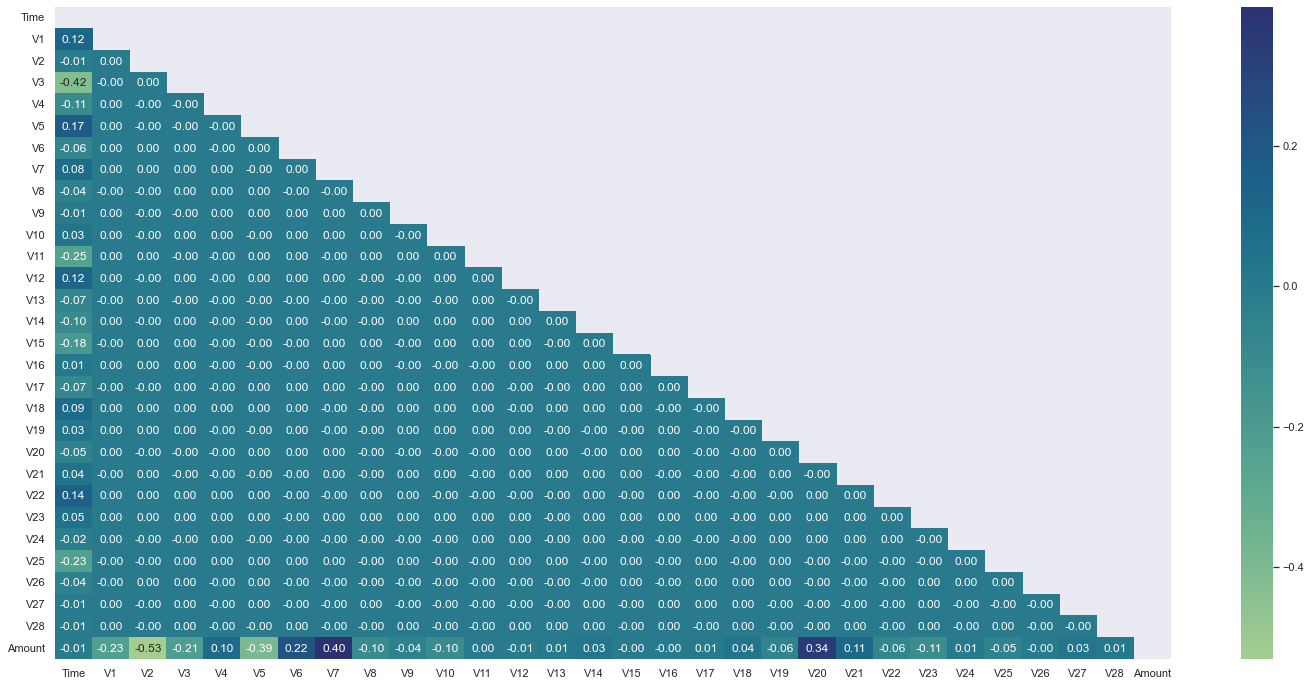

In [21]:
plt.figure(figsize=(25,12))

mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr, 
            cmap='crest', 
            annot=True,
            fmt='.2f', 
            mask=mask)

A correlação mais forte que temos é -0,53 e depois 0,40, seguida de -0,39 e 0,34, essas não são correlações fortes a ponto de precisarmos eliminá-las, aqui não teremos problema de alta correlação

## Pré processamento

In [22]:
from sklearn.preprocessing import StandardScaler
df[['Time', 'Amount']] = StandardScaler().fit_transform(df[['Time', 'Amount']])

## Modelagem
Nesse exemplos temos um alvo desequilibrado, a variável de destino está desbalanceada, o que pode impactar negativamente o desempenho do modelo de aprendizado de máquina. Para resolver esse problema, usei várias técnicas, incluindo subamostragem, subamostragem e geração de dados sintéticos.

In [23]:
def re_sampling(x):
  df_nonfraud = df[ df.Class == 0 ].sample(x, random_state=0)
  df_fraud  = df[ df.Class == 1 ]

  df_gen = pd.concat([df_nonfraud, df_fraud]).sample(frac=1)
  X_gen = df_gen.drop('Class', axis = 1)
  y_gen = df_gen.Class
  return X_gen, y_gen

### Subamostragem

In [24]:
df.Class.value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [25]:
x_sample = int(492 * 95 / 5) # 95% out of 492 where 492 represents 5% percent

X_under, y_under = re_sampling(x_sample)

<AxesSubplot:xlabel='Class', ylabel='count'>

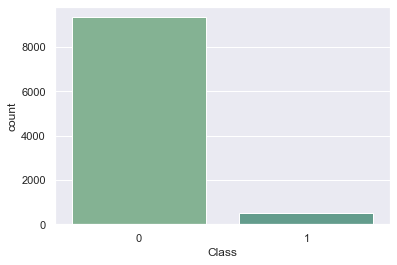

In [26]:
sns.countplot(x=y_under)

In [27]:
y_under.value_counts()

0    9348
1     492
Name: Class, dtype: int64

In [28]:
y_under.value_counts(normalize=True)

0    0.95
1    0.05
Name: Class, dtype: float64

In [29]:
df.Class.value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [30]:
x_sample = int(492 * 80 / 20) # 80% out of 492 where 492 represents 20% percent

X_sub, y_sub = re_sampling(x_sample)

<AxesSubplot:xlabel='Class', ylabel='count'>

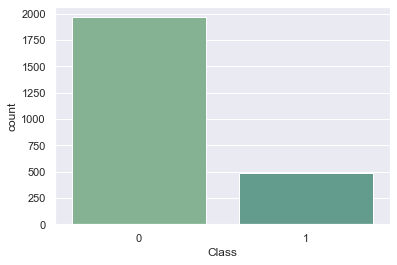

In [31]:
sns.countplot(x=y_sub)

In [32]:
y_sub.value_counts()

0    1968
1     492
Name: Class, dtype: int64

In [33]:
y_sub.value_counts(normalize=True)

0    0.8
1    0.2
Name: Class, dtype: float64

## Comparação de performance de metricas
Testando vários algoritmos
- precisão mede a proporção de previsões positivas verdadeiras entre todas as previsões positivas.
- recall mede a proporção de previsões positivas verdadeiras entre todas as instâncias positivas reais.
- F1-score é a média harmônica de precisão e recall.
- roc_auc é a área sob a curva característica de operação do receptor, que mostra a compensação entre a taxa de verdadeiros positivos e a taxa de falsos positivos.
- run_time mede o tempo que leva para o modelo treinar e fazer previsões.
- Finalmente, o mean_metrics é a média de precisão, recall e f1-score.

In [40]:
import time
from sklearn.model_selection import RepeatedKFold, cross_validate, train_test_split

from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

In [41]:
algorithms = {
    'DT': DecisionTreeClassifier(random_state=0),
    'LR': LogisticRegression(random_state=0, max_iter=500),
    'KNN': KNeighborsClassifier(),
    'GauNB': GaussianNB(),
    'BerNB': BernoulliNB(),
    'RF': RandomForestClassifier(random_state=0),
    'GradB': GradientBoostingClassifier(random_state=0),
    'SVC': SVC(random_state=0),
    'MLPC': MLPClassifier(random_state=0, max_iter=1500) 
}

In [42]:
from sklearn.metrics import make_scorer, precision_score, recall_score, f1_score, roc_auc_score

scoring = {
    'precision': make_scorer(precision_score, average='weighted', zero_division=0),
    'recall': make_scorer(recall_score, average='weighted', zero_division=0),
    'f1': make_scorer(f1_score, average='weighted', zero_division=0),
    'roc_auc': make_scorer(roc_auc_score, average='weighted', multi_class='ovr')
}

In [43]:
def test_algorithms(X,y):
  result = pd.DataFrame()
  cv = RepeatedKFold(n_splits=5, n_repeats=3, random_state=0)
    
  for key, algorithm in algorithms.items():
    start_time = time.time()
    print(f'{key}...', end = '')
    model = algorithm

    cv_results = cross_validate(model, X, y, cv=cv, scoring=scoring, return_estimator =True)

    new_row = {
        'Algorithm': key,
        'precision': round(np.mean(cv_results['test_precision']), 5),
        'recall': round(np.mean(cv_results['test_recall']), 5),
        'f1': round(np.mean(cv_results['test_f1']), 5),
        'roc_auc': round(np.mean(cv_results['test_roc_auc']), 5),
        'run_time': round((time.time() - start_time) / 60, 2),
        'model': cv_results['estimator'][0]
      }
    result = pd.concat([result, pd.Series(new_row)], axis=1)
    print(f'finished!!! {round((time.time() - start_time) / 60, 2)} min(s).')
  return result.transpose().sort_values(by='f1', ascending=False)

In [44]:
# Undersampling
result_under = test_algorithms(X_under, y_under)

DT...finished!!! 0.07 min(s).
LR...finished!!! 0.01 min(s).
KNN...finished!!! 0.06 min(s).
GauNB...finished!!! 0.0 min(s).
BerNB...finished!!! 0.0 min(s).
RF...finished!!! 0.74 min(s).
GradB...finished!!! 1.45 min(s).
SVC...finished!!! 0.07 min(s).
MLPC...finished!!! 1.35 min(s).


In [45]:
# Subsampling
result_sub = test_algorithms(X_sub, y_sub)

DT...finished!!! 0.01 min(s).
LR...finished!!! 0.01 min(s).
KNN...finished!!! 0.01 min(s).
GauNB...finished!!! 0.0 min(s).
BerNB...finished!!! 0.0 min(s).
RF...finished!!! 0.14 min(s).
GradB...finished!!! 0.32 min(s).
SVC...finished!!! 0.01 min(s).
MLPC...finished!!! 0.56 min(s).


In [46]:
result_under['Method'] = 'Undersampling'
result_sub['Method'] = 'Subsampling'

result = pd.concat([result_under, result_sub], axis=0)

In [47]:
result['run_time'].sum()

4.81

In [48]:
metrics = ['precision', 'recall', 'f1', 'roc_auc']
result['mean_metrics'] = result[metrics].mean(axis=1)

In [49]:
result.set_index([ 'Method', 'Algorithm' ]).sort_values(by='f1', ascending=False).drop('model', axis=1)

precision   recall       f1  roc_auc run_time  \
Method        Algorithm                                                 
Undersampling RF          0.99182  0.99184  0.99152  0.92232     0.74   
              KNN         0.99134  0.99136  0.99101  0.91844     0.06   
              SVC         0.99098  0.99096  0.99055  0.91214     0.07   
              LR          0.99048  0.99062   0.9903  0.91904     0.01   
              MLPC        0.99034  0.99048  0.99027  0.92886     1.35   
              GradB       0.98874  0.98899  0.98876   0.9223     1.45   
              BerNB       0.98782  0.98791  0.98722  0.88653        0   
              DT          0.98356  0.98323  0.98336  0.91893     0.07   
Subsampling   KNN          0.9719  0.97154  0.97088  0.93532     0.01   
Undersampling GauNB       0.97464  0.96863  0.97078  0.91432        0   
Subsampling   MLPC        0.96962  0.96978  0.96944  0.94296     0.56   
              RF          0.97072  0.97019  0.96939  0.93033     0.14   
              LR          0.96952  0.96938  0.96879  0.93511     0.01   
              GradB        0.9681  0.96816  0.96757   0.9339     0.32   
              SVC         0.96839  0.96775  0.96683  0.92512     0.01   
              BerNB       0.96041  0.95881  0.95702  0.89909        0   
              GauNB        0.9521  0.95244  0.95209  0.91866        0   
              DT          0.95102     0.95  0.95025   0.9262     0.01   

                         mean_metrics  
Method        Algorithm                
Undersampling RF             0.974375  
              KNN            0.973037  
              SVC            0.971157  
              LR             0.972610  
              MLPC           0.974988  
              GradB          0.972197  
              BerNB          0.962370  
              DT             0.967270  
Subsampling   KNN            0.962410  
Undersampling GauNB          0.957093  
Subsampling   MLPC           0.962950  
              RF             0.960158  
              LR             0.960700  
              GradB          0.959433  
              SVC            0.957022  
              BerNB          0.943833  
              GauNB          0.943823  
              DT             0.944368

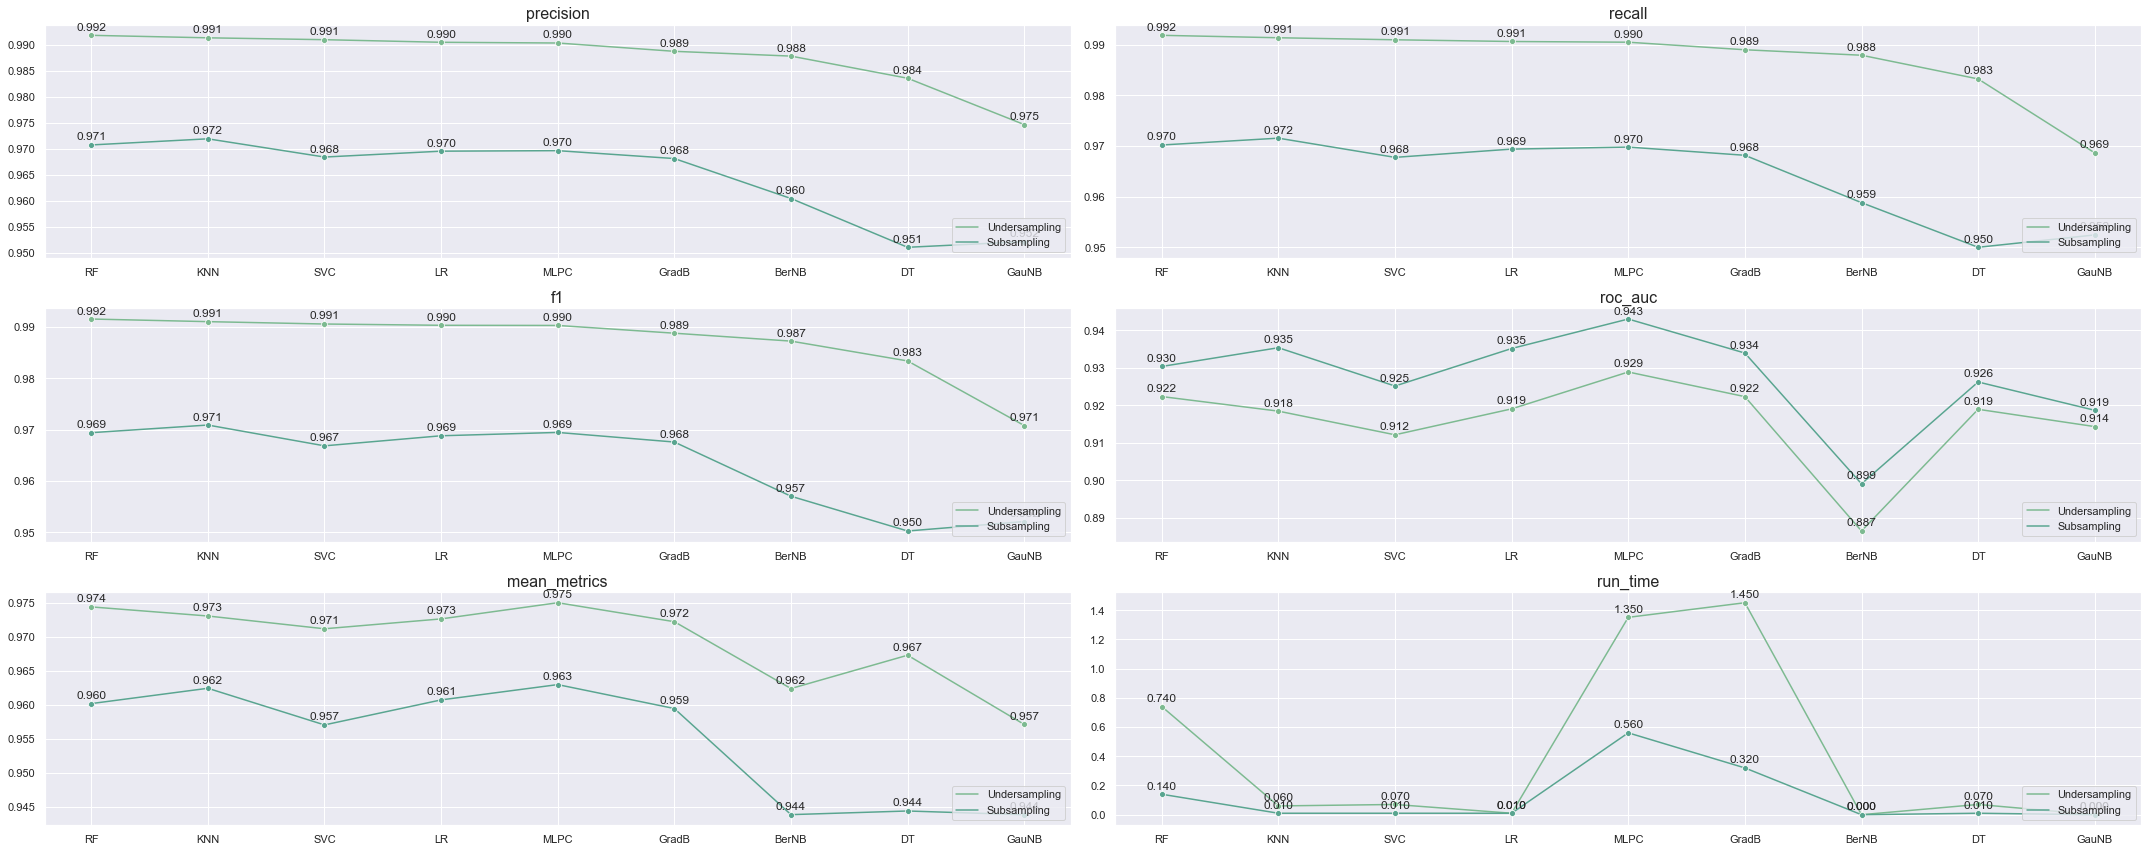

In [63]:
columns = ['precision', 'recall', 'f1', 'roc_auc', 'mean_metrics', 'run_time']

fig, axs = plt.subplots(3,2, figsize=(30,12))
axs = axs.ravel()

df_result_norm = result.reset_index()

for i, col in enumerate(columns):
    sns.lineplot(data=df_result_norm, x='Algorithm', y=col, hue='Method',marker='o', ax=axs[i])
    axs[i].set(xlabel='', ylabel='')
    axs[i].set_title(label =col, fontsize=16)
    axs[i].legend(loc='lower right')
    for line in axs[i].lines:
        x, y = line.get_data()
        for xi, yi in zip(x, y):
            axs[i].annotate(format(yi, '.3f'), (xi, yi), textcoords='offset points', xytext=(0,5), ha='center')

plt.tight_layout()
